# Proyecto 01

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
proyecto_data = np.load('./data/proyecto_training_data.npy')

In [3]:
proyecto_data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [224]:
class Proyecto():    
    test_size = 0.2

    #constructor
    def __init__(self, proyecto_data):
        self.proyecto_data = proyecto_data
        self.data_train, self.data_test = train_test_split(proyecto_data, test_size=self.test_size)

        self.df_train = pd.DataFrame(self.data_train)
        self.df_test = pd.DataFrame(self.data_test)
        
        self.df_train = self.df_train.rename(columns={0: "SalePrice", 1: "OverallQual", 2: "1stFlrSF", 3: "TotRmsAbvGrd", 4: "YearBuilt", 5: "LotFrontage"})
        self.df_test = self.df_test.rename(columns={0: "SalePrice", 1: "OverallQual", 2: "1stFlrSF", 3: "TotRmsAbvGrd", 4: "YearBuilt", 5: "LotFrontage"})
        
        self.iter_df_manual = None
        
        
    def analisisExploratorio(self):
        df_train_explore = self.df_train.describe()
        df_test_explore = self.df_test.describe()
        return df_train_explore, df_test_explore
    
    def correlacionVariables(self):
        ind_var_columns = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
        for colName in ind_var_columns:
            corr = self.df_train[colName].corr(self.df_train["SalePrice"])
            print(f"Corr {colName}: {corr}")
            plt.scatter(self.df_train[colName],self. df_train["SalePrice"], color = 'hotpink')
            plt.title(f"Corr {colName}: {'%.3f' % corr}")
            plt.show()
    
    def generarHistogramas(self):
        fig, axes = plt.subplots(3, 2, figsize=(15, 10))
        sns.histplot(data=self.df_train["SalePrice"], ax=axes[0,0])
        sns.histplot(data=self.df_train["OverallQual"], ax=axes[0,1])
        sns.histplot(data=self.df_train["1stFlrSF"], ax=axes[1,0])
        sns.histplot(data=self.df_train["TotRmsAbvGrd"], ax=axes[1,1])
        sns.histplot(data=self.df_train["YearBuilt"], ax=axes[2,0])
        sns.histplot(data=self.df_train["LotFrontage"], ax=axes[2,1])
        
    def definirXY(self, x_name, y_name):
        x = self.df_train[x_name]
        y = self.df_train[y_name]
        return x, y
    
    def definirXYtest(self, x_name, y_name):
        x = self.df_test[x_name]
        y = self.df_test[y_name]
        return x, y
        
        
    def regresion_lineal(self,x,y,epochs,alfa,b0,b1,imprimir_error_cada):

        iteration_df = pd.DataFrame(columns=['iter', 'b1', 'b0', 'error'])
        print_count = 0

        for i in range(0, epochs):

            matriz = np.column_stack((x, np.ones(len(x))))
            y_iter = np.dot(matriz, [b1, b0])

            error = sum(np.square((y-y_iter)))/(2*len(y))

            new_row = pd.Series({
                'iter': i+1,
                'b1': b1,
                'b0': b0,
                'error': error
            })


            iteration_df = pd.concat([iteration_df, new_row.to_frame().T], ignore_index=True)

            print_count+=1

            if(print_count == imprimir_error_cada):
                print_count = 0
                print( 'Iteracion: {}, error: {}'.format( i+1, error))

            grad_b1 = sum((y_iter-y)*x)/len(y)
            grad_b0 = sum((y_iter-y))/len(y)

            b0 = b0 - alfa*grad_b0
            b1 = b1 - alfa*grad_b1
            
            self.iter_df_manual = iteration_df
        return iteration_df
    
    def graficar_iter(self, iter_df):
        ax = plt.gca()
        iter_df.plot(kind='line',x='iter',y='error', color='blue', ax=ax)
        plt.show()
    
    
    def graficar_modelo(self, x,y,iter_df, cada_cuanta, plot_xy=True):
        if(plot_xy):
            plt.scatter(x, y,  marker='.')
        counter = 1
        for i in range(0, len(iteration_df)):
            if( counter == cada_cuanta):
                plt.plot(x, iter_df.loc[i]['b0'] + iter_df.loc[i]['b1'] *x, linestyle='-')
                counter = 1
            else:
                counter +=1
        plt.show()
    
    
    def modelo_scikit(self,x,y):
        reg = LinearRegression().fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
        return reg
    
    def avg_models(self,manual_model, modelo_scikit, x_test):
        pred_modelo_manual = (manual_model).iloc[-1]['b0'] + (manual_model).iloc[-1]['b1']*x_test.values.reshape(-1,1)
        pred_scikit = modelo_scikit.predict(x_test.values.reshape(-1,1))
        avg_pred = np.mean( np.array([ pred_modelo_manual, pred_scikit ]), axis=0 )
        return pred_modelo_manual, pred_scikit, avg_pred
    
    def plot_errores(self,error_values, title):
        plt.plot(error_values)
        plt.title(title)
        plt.yscale('linear')
        plt.show()
    
    def err_modelos(self,pred_modelo_manual,pred_scikit, avg_pred, y_test):
        yt = y_test.values.reshape(-1,1)
        err_modelo_manual = (0.5/len(y_test))*(yt-pred_modelo_manual)**2
        err_scikit = (0.5/len(y_test))*(yt - pred_scikit)**2
        err_avg_pred = (0.5/len(y_test))*(yt - avg_pred)**2

        self.plot_errores(err_modelo_manual,"Modelo Manual")
        self.plot_errores(err_scikit,"Modelo Scikit")
        self.plot_errores(err_avg_pred,"Modelo Avg")

        print( 'Error modelo manual: {}, Error modelo scikit: {}, error modelo avg: {}'.format( sum(err_modelo_manual), sum(err_scikit), sum(err_avg_pred)))
        
        dict1 = {
            'modelo': ['manual','scikit','avg'],
            'error': [sum(err_modelo_manual)[0], sum(err_scikit)[0], sum(err_avg_pred)[0]]
        }

        df_err = pd.DataFrame(dict1)

        print( 'Mejor modelo a ser usado (menor error):')
        print( df_err[df_err['error'] == df_err['error'].min()])
                 
    def returnProyectoData(self):
        return f"{self.proyecto_data}"
    

In [225]:
Proyecto = Proyecto(proyecto_data)

In [226]:
df_train_explore, df_test_explore = Proyecto.analisisExploratorio()

In [227]:
df_train_explore

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,959.000000
mean,180468.815068,6.083904,1162.307363,6.516267,1970.834760,70.302398
std,78121.786172,1.372948,389.253830,1.620269,30.284839,24.177326
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,130000.000000,5.000000,883.500000,5.000000,1953.000000,60.000000
50%,163000.000000,6.000000,1086.000000,6.000000,1972.000000,70.000000
75%,214000.000000,7.000000,1378.750000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [228]:
df_test_explore

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,242.000000
mean,182730.719178,6.160959,1163.904110,6.523973,1973.000000,69.049587
std,84635.857618,1.423218,376.386004,1.648526,29.861536,24.731203
min,37900.000000,1.000000,483.000000,3.000000,1890.000000,21.000000
25%,129675.000000,5.000000,875.500000,5.000000,1956.000000,55.000000
50%,163500.000000,6.000000,1089.000000,6.000000,1976.000000,69.000000
75%,211250.000000,7.000000,1432.500000,7.000000,2002.000000,80.000000
max,745000.000000,10.000000,2411.000000,12.000000,2009.000000,160.000000


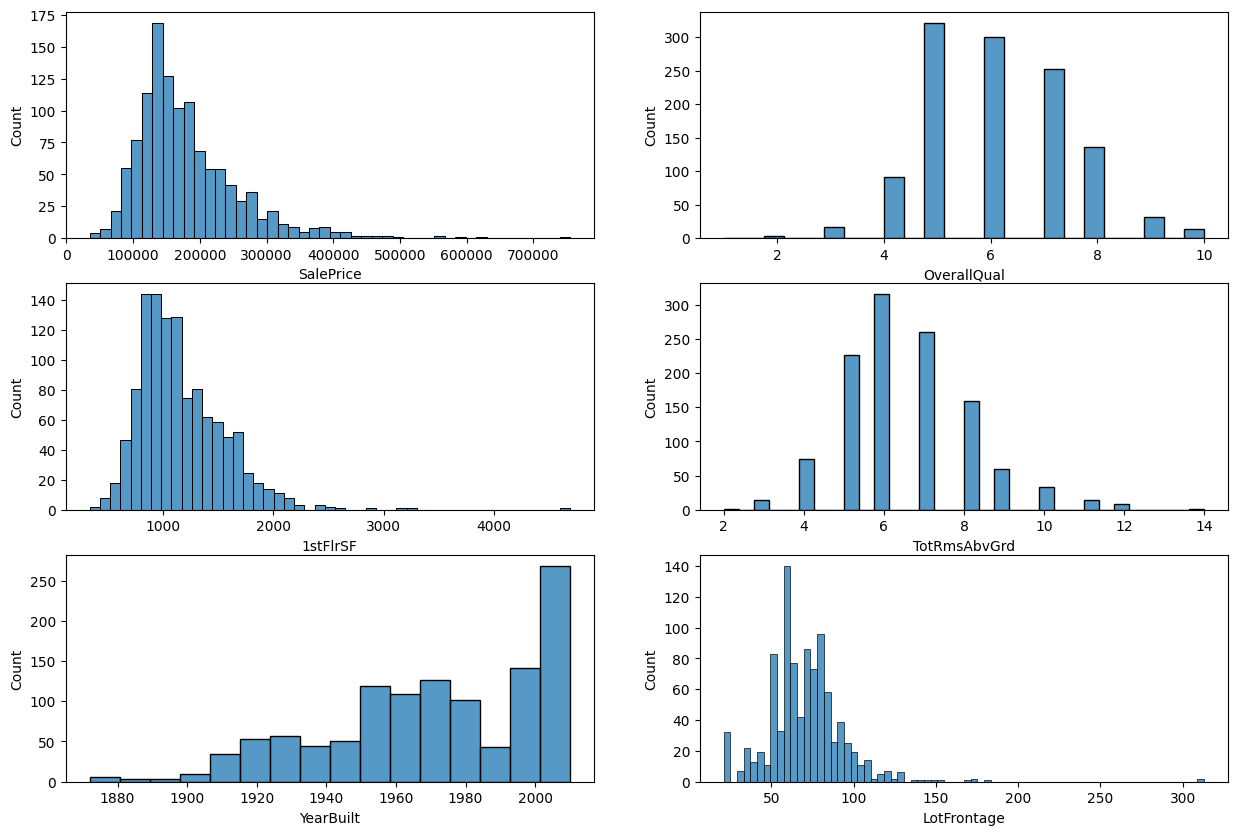

In [229]:
Proyecto.generarHistogramas()

Corr OverallQual: 0.7935166416693425


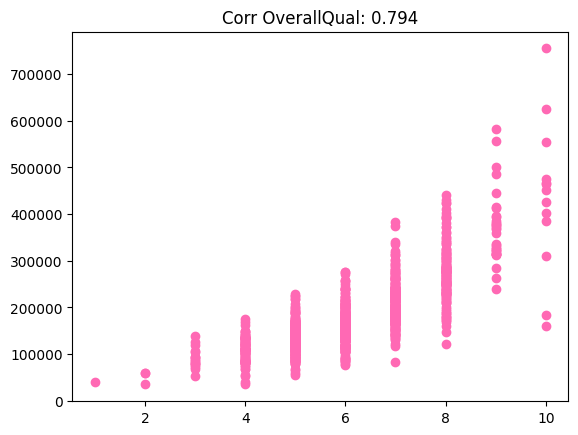

Corr 1stFlrSF: 0.6070284135218237


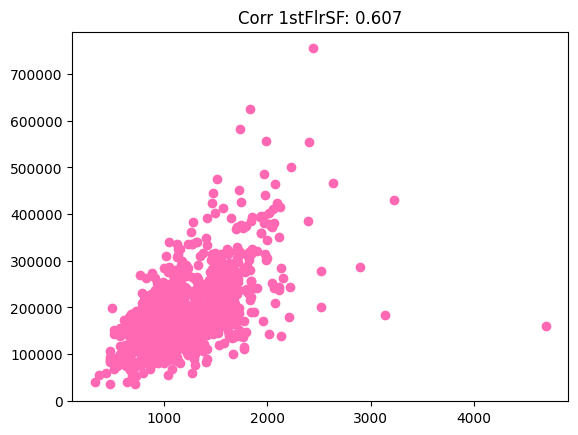

Corr TotRmsAbvGrd: 0.5337342770846881


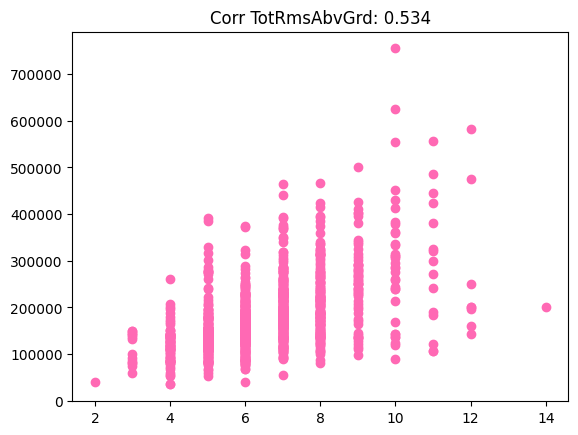

Corr YearBuilt: 0.5273791044093649


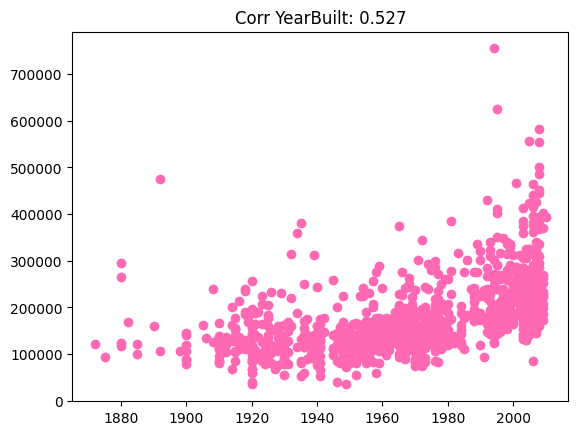

Corr LotFrontage: 0.34673969397831894


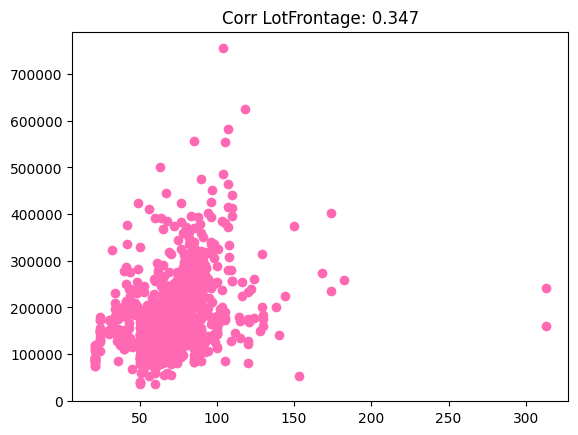

In [230]:
Proyecto.correlacionVariables()

In [231]:
x, y = Proyecto.definirXY("OverallQual", "SalePrice")

In [232]:
iteration_df = Proyecto.regresion_lineal(x,y,2000,0.03,0.01,0.01,500)

Iteracion: 500, error: 1186540899.9093015
Iteracion: 1000, error: 1143001025.9568987
Iteracion: 1500, error: 1132464732.5807054
Iteracion: 2000, error: 1129915035.7618608


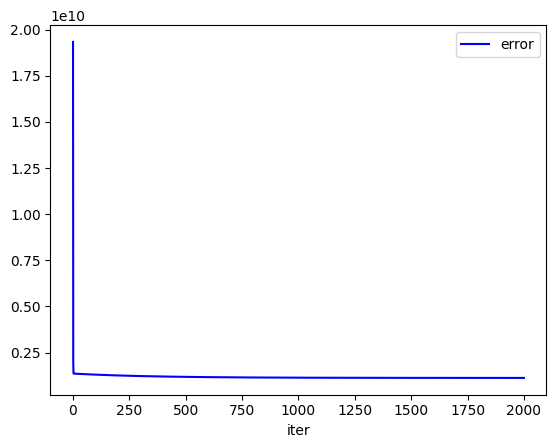

In [233]:
Proyecto.graficar_iter(iteration_df)

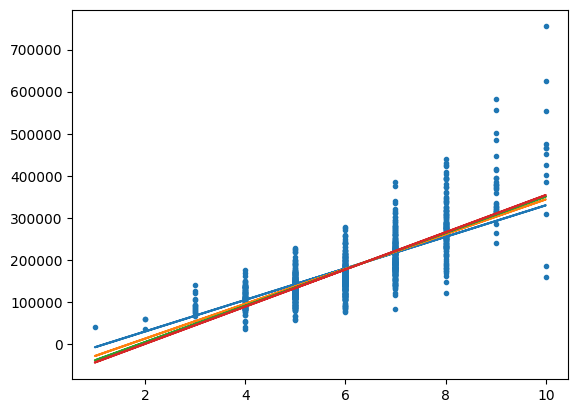

In [234]:
Proyecto.graficar_modelo(x,y,iteration_df,500)

In [235]:
x, y = Proyecto.definirXY("1stFlrSF", "SalePrice")

In [236]:
iteration_df = Proyecto.regresion_lineal(x,y,1000,0.000001,120000,5,100)

Iteracion: 100, error: 2257078456.8259544
Iteracion: 200, error: 2257071772.912702
Iteracion: 300, error: 2257065089.1341586
Iteracion: 400, error: 2257058405.490316
Iteracion: 500, error: 2257051721.981176
Iteracion: 600, error: 2257045038.6067257
Iteracion: 700, error: 2257038355.366968
Iteracion: 800, error: 2257031672.261901
Iteracion: 900, error: 2257024989.291525
Iteracion: 1000, error: 2257018306.455829


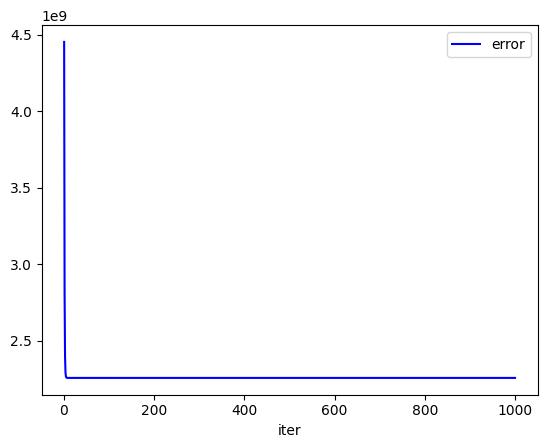

In [237]:
Proyecto.graficar_iter(iteration_df)

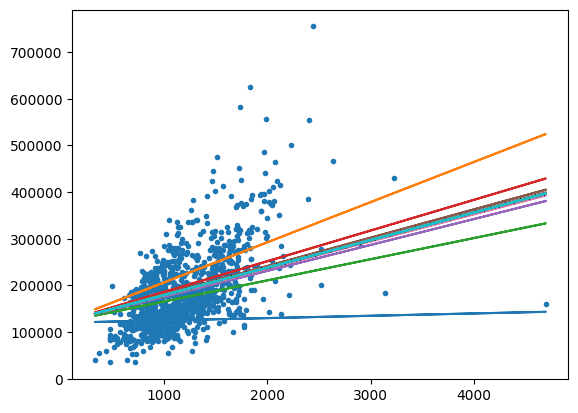

In [238]:
Proyecto.graficar_modelo(x,y,iteration_df,1)

## Scikit-learn

In [239]:
x, y = Proyecto.definirXY("OverallQual", "SalePrice")

In [240]:
modelo_scikit = Proyecto.modelo_scikit(x,y)
iteration_df = Proyecto.regresion_lineal(x,y,2000,0.03,0.01,0.01,500)

Iteracion: 500, error: 1186540899.9093015
Iteracion: 1000, error: 1143001025.9568987
Iteracion: 1500, error: 1132464732.5807054
Iteracion: 2000, error: 1129915035.7618608


In [241]:
x_test, y_test = Proyecto.definirXYtest("OverallQual", "SalePrice")

In [242]:
pred_modelo_manual, pred_scikit, avg_pred = Proyecto.avg_models(iteration_df, modelo_scikit, x_test)

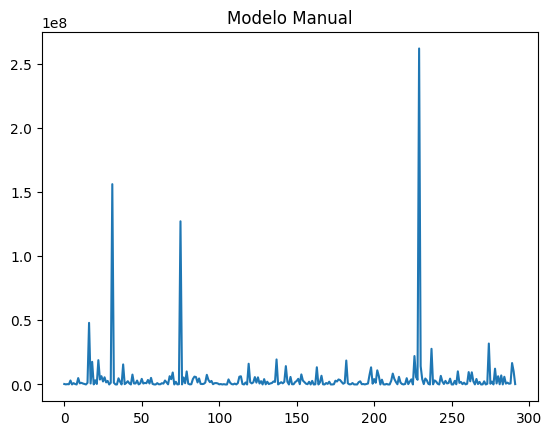

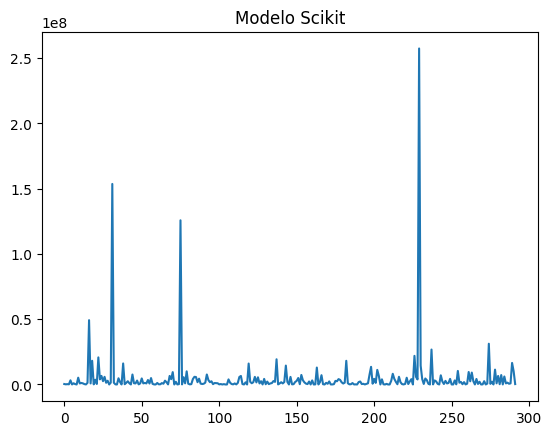

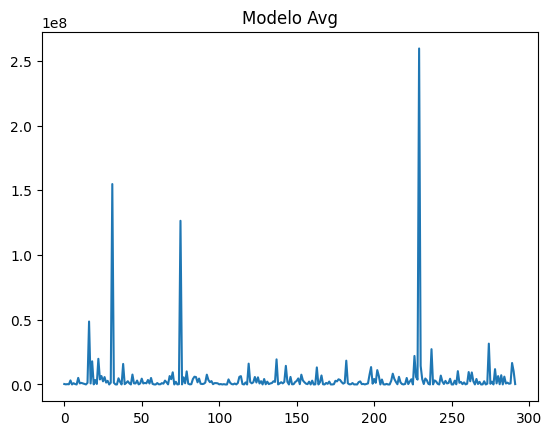

Error modelo manual: [1.39010035e+09], Error modelo scikit: [1.38646553e+09], error modelo avg: [1.38806969e+09]
Mejor modelo a ser usado (menor error):
   modelo         error
1  scikit  1.386466e+09


In [243]:
Proyecto.err_modelos( pred_modelo_manual,pred_scikit, avg_pred, y_test)